# Data Preprocessing: Preparing the data for model development.

### Data Pre-processing Steps:

1. Data Inspection:<br>Quick inspection to understand the structure, type, and summary statistics.  
2. Handling Missing Values:<br>Identify and address missing values, either by imputation or by removal.<br>
3. Date Parsing and Indexing:<br>Make sure the time variable is recognized as a date and set as the DataFrame index if using Pandas.<br>        
4. Data Visualization:<br>Plot the data to understand its trend, seasonality, and other patterns.<br>
5. Descriptive Statistics:<br>  Run summary statistics to get insights about the central tendency, dispersion, and shape of the distribution.<br>
6. Check for outliers.<br>
7. Series Decomposition:Check for base, trend, seasonality and noise (residuals)<br>
8. Stationarity check for ARIMA model using adfuller test.
9. Check for variance using Rolling window <br>


In [1]:
# Import relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression



In [2]:
# Load the time series file from location

cyber_time_series = pd.read_csv('/Users/gorji1/Desktop/MSC_RESEARCH_PROJECT/Data_sets/final_time_series.csv', index_col='Year')

In [3]:
# Step 1: Data Inspection

# Check the data types and summary statistics

# Check data types

cyber_time_series.dtypes


no_of_attacks    float64
dtype: object

In [4]:
# Step 2: Handling Missing Values
# Check for any missing values in the dataset

# Check for missing values

missing_values = cyber_time_series.isnull().sum()
missing_values

no_of_attacks    0
dtype: int64

<font size = '3.0'>
No missing values detected.
</font>

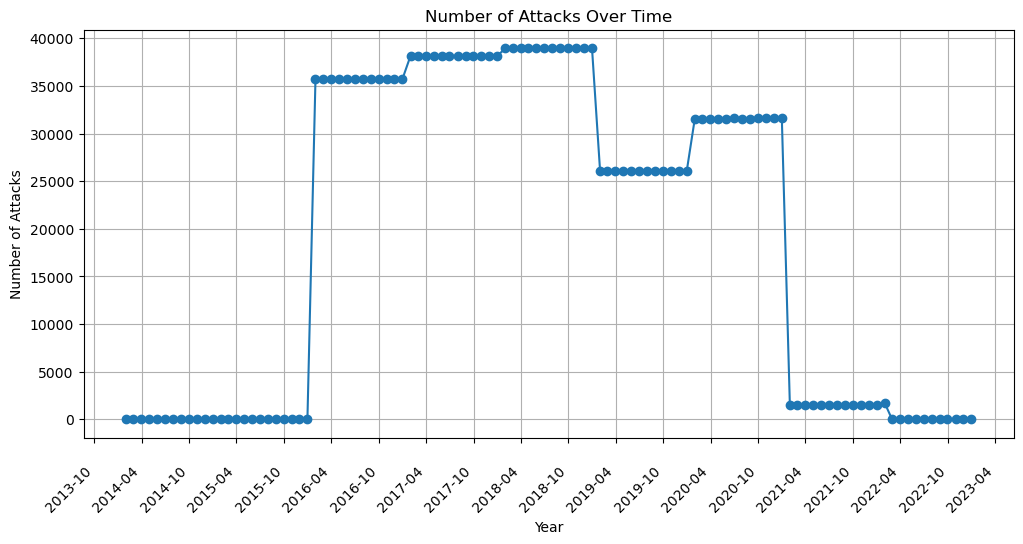

In [5]:

# Step 3 Date Parsing :  # Correctly convert the 'Year' column to a datetime index 

cyber_time_series.index = pd.to_datetime(cyber_time_series.index)

# Step 4 data visualisation

plt.figure(figsize=(12, 6))
plt.plot(cyber_time_series['no_of_attacks'],marker='o', linestyle='-')
plt.title('Number of Attacks Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
locator = mdates.MonthLocator(interval=6)  # this locator puts ticks at regular intervals
plt.gca().xaxis.set_major_locator(locator)
# Specify the format of the date text on the x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.gcf().autofmt_xdate(rotation=45)  # Rotate the x-axis labels to avoid overlapping
plt.gca().tick_params(axis='x', which='major', pad=15)  # Increase the padding between tick labels and the axis
plt.grid(True)
plt.show()






In [6]:
# Step 5

# summary stats
cyber_time_series.describe()

,no_of_attacks
count,108.000000
mean,19136.268519
std,17195.045703
min,4.000000
25%,32.000000
50%,26101.000000
75%,35745.250000
max,38959.000000


<font size = '3.0'>
The result for the dtypes shows that the 'Year' is not in the date format, this will be converted to the right format, before plotting the time-series.
</font>

## Checking for outliers.<br>
### Using z scores to determine any outliers apart from visual inspection.

In [7]:
from scipy import stats
import numpy as np

# Calculating z-scores
z_scores = np.abs(stats.zscore(cyber_time_series['no_of_attacks']))

# Assuming outliers are data points that are more than 3 standard deviations from the mean (commonly used criterion)
outlier_threshold = 3
outliers = np.where(z_scores > outlier_threshold)

# Extracting the actual values of potential outliers for verification
potential_outliers = cyber_time_series.iloc[outliers]['no_of_attacks']

# Information about potential outliers
outlier_info = {
    "Indices": outliers[0],
    "Potential Outliers": potential_outliers.values
}

outlier_info


{'Indices': array([], dtype=int64),
 'Potential Outliers': array([], dtype=float64)}

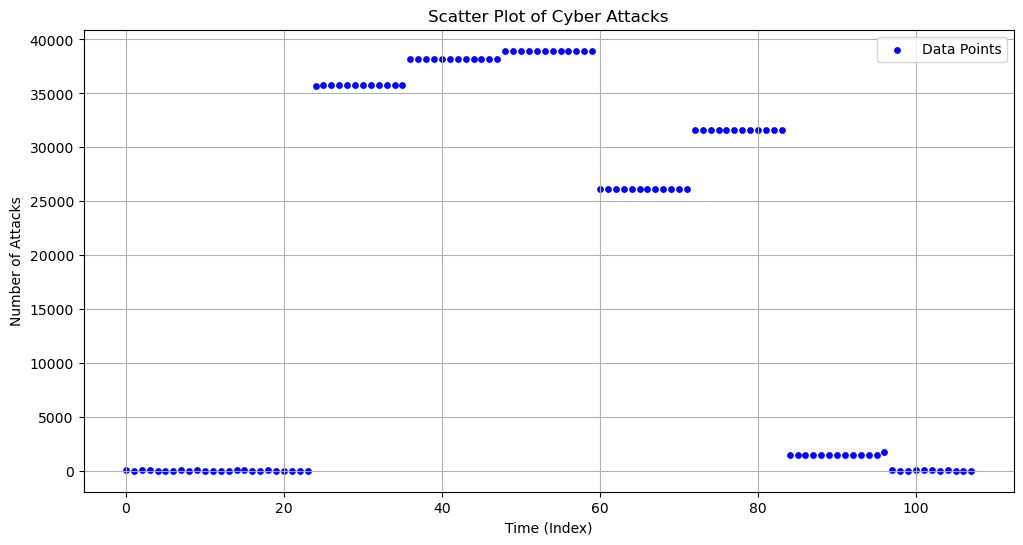

In [8]:
# Creating the scatter plot with a legend
plt.figure(figsize=(12, 6))

# All data points
plt.scatter(range(len(cyber_time_series['no_of_attacks'])), 
            cyber_time_series['no_of_attacks'],
            marker ='o', color='blue', s=15, label='Data Points')



if len(outliers[0]) > 0:  # if there are any outliers
    plt.scatter(outliers[0], cyber_time_series.iloc[outliers]['no_of_attacks'], 
                color='red', s=50, label='Potential Outliers', marker='x')

plt.title('Scatter Plot of Cyber Attacks')
plt.xlabel('Time (Index)')
plt.ylabel('Number of Attacks')
plt.grid(True)

# Adding the legend to the plot
plt.legend()

# Displaying the plot with the legend
plt.show()


### No outliers identified

## Decomposing the series

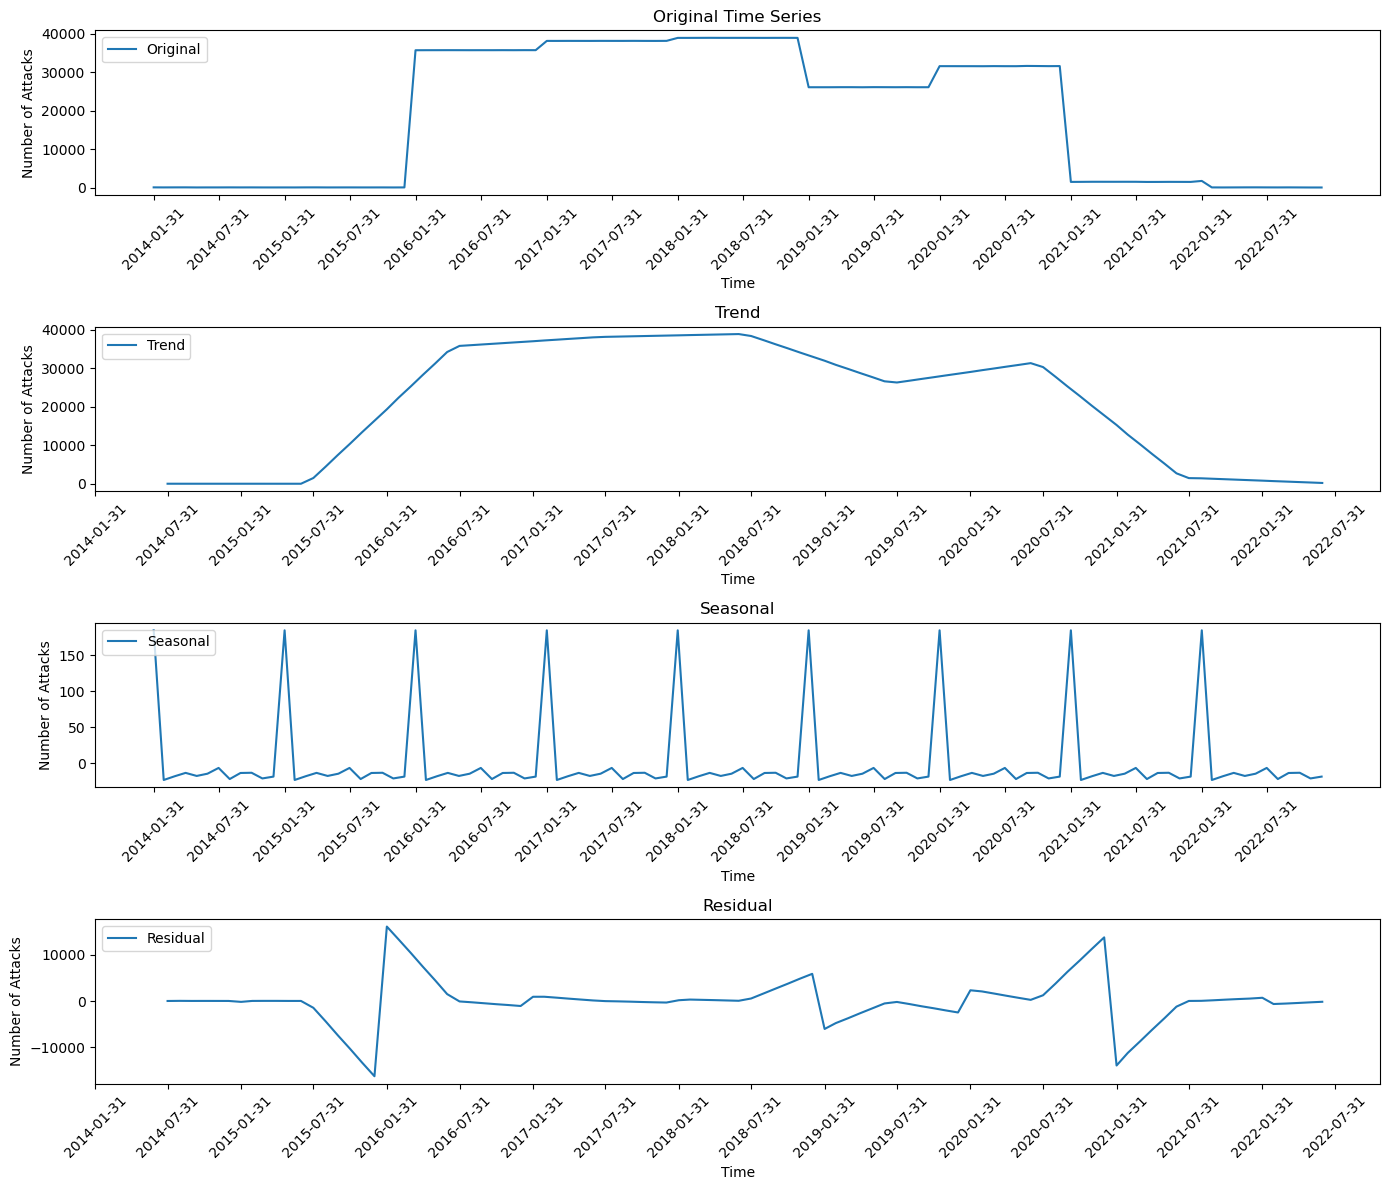

In [9]:
# Step 7  Decomposition series

# Import the necessary library for time series decomposition

from statsmodels.tsa.seasonal import seasonal_decompose


# The period is set to 12 for monthly data to capture yearly seasonality

decomposition = seasonal_decompose(cyber_time_series['no_of_attacks'], period=12)

# Extract the individual components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the original data, the trend, the seasonality, and the residuals 
plt.figure(figsize=(14, 12))

plt.subplot(411)
plt.plot(cyber_time_series['no_of_attacks'], label='Original')
plt.legend(loc='upper left')
plt.title('Original Time Series')
plt.xlabel('Time')
plt.ylabel('Number of Attacks')
plt.xticks(ticks=residual.index[::6], rotation=45)

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.title('Trend')
plt.xlabel('Time')
plt.ylabel('Number of Attacks')
plt.xticks(ticks=residual.index[::6], rotation=45)

plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.title('Seasonal')
plt.xlabel('Time')
plt.ylabel('Number of Attacks')
plt.xticks(ticks=residual.index[::6], rotation=45)

plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='upper left')
plt.title('Residual')
plt.xlabel('Time')
plt.ylabel('Number of Attacks')
plt.xticks(ticks=residual.index[::6], rotation=45)

plt.tight_layout()
plt.show()


<font size = '3.0'>


The time series has been decomposed into its constituent components:

Observed: This is the original time series data.<br>
Trend: This captures the underlying trend in the data. It represents the long-term progression of the series (either up or down).<br>
Seasonal: This captures the repetitive and periodic fluctuations in the data. In this case, a 12-month cycle is assumed.<br>
Residual: This represents the error or noise left after extracting the trend and seasonality.<br>
    
From the decomposition:<br>

There seems to be an upward trend in the number of cyber attacks over the years.
There is a clear seasonality pattern that repeats every year.
The residuals show variations that couldn't be explained by the trend or seasonality.
This decomposition provides a clearer understanding of the underlying patterns and behaviors of the time series data.
</font>

In [10]:
# Step 8: Stationarity Check for ARIMA
# Use the Augmented Dickey-Fuller test to check for stationarity
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(cyber_time_series['no_of_attacks'])
adf_summary = {
    'Test Statistic': adf_result[0],
    'p-value': adf_result[1],
    'Lags Used': adf_result[2],
    'Number of Observations Used': adf_result[3],
    'Critical Value (1%)': adf_result[4]['1%'],
    'Critical Value (5%)': adf_result[4]['5%'],
    'Critical Value (10%)': adf_result[4]['10%'],
}

adf_summary

{'Test Statistic': -1.4288467643489848,
 'p-value': 0.5683711765530164,
 'Lags Used': 0,
 'Number of Observations Used': 107,
 'Critical Value (1%)': -3.492995948509562,
 'Critical Value (5%)': -2.888954648057252,
 'Critical Value (10%)': -2.58139291903223}

<font size = '3.0'>
    
The results from the Augmented Dickey-Fuller (ADF) test are as follows:  
    
    
    
    

**Test Statistic**: −1.4288<br>
**p-value**: 0.5684<br>
**Lags Used**: 0<br>
**Number of Observations Used**:107<br>
**Critical Value (1%)**: −3.4930<br>
**Critical Value (5%)**: −2.8890<br>
**Critical Value (10%)**: −2.5814<br>  
    
The key value to consider here is the p-value. A p-value less than 0.05 (or a chosen level of significance) would indicate that the time series is stationary. However, in this case, the p-value is 0.5684, which means we fail to reject the null hypothesis and the time series is not stationary.

This suggests that some form of differencing might be necessary to make the series stationary before applying models like ARIMA.
</font>

## Checking data for volatility  and heteroscedasticity using a 6 month rolling window.

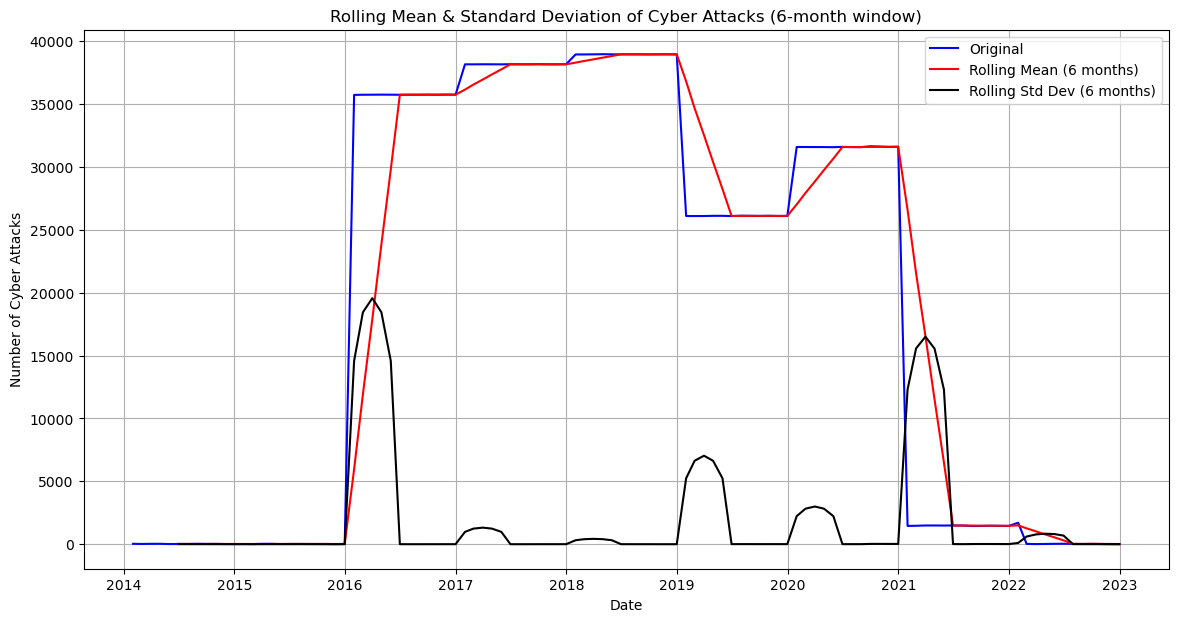

In [11]:

# Calculating rolling mean and standard deviation with a 12-month window
rolling_mean = cyber_time_series['no_of_attacks'].rolling(window=6).mean()
rolling_std = cyber_time_series['no_of_attacks'].rolling(window=6).std()

# Creating a plot of the original data, the rolling mean, and the rolling standard deviation
plt.figure(figsize=(14, 7))

plt.plot(cyber_time_series['no_of_attacks'], color='blue', label='Original')
plt.plot(rolling_mean, color='red', label='Rolling Mean (6 months)')
plt.plot(rolling_std, color='black', label='Rolling Std Dev (6 months)')

plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation of Cyber Attacks (6-month window)')
plt.xlabel('Date')
plt.ylabel('Number of Cyber Attacks')
plt.grid(True)
plt.show()


<font size = '3.5'>
 

>**Prompt Responsiveness to Trends**: It enhances the detection of recent shifts in cybersecurity threats, allowing for agile strategic adjustments.  
    
>**Noise Reduction**: This approach balances the recognition of emerging patterns with the elimination of insignificant fluctuations, ensuring decisions are based on substantial changes.  
    
>**Recognition of Semi-Annual Patterns**: The method is adept at identifying biannual trends, potentially linked to cyclical aspects within the cybersecurity landscape.  
    
>**Computational Efficiency**: It optimizes processing demands, particularly beneficial for extensive datasets, by minimizing necessary calculations.  
    
>**Strategic Forecasting Utility**: Aligning with common planning cycles, it facilitates anticipatory defense strategies over reactive measures, catering to medium-term security preparations.  
    
>**Enhanced Anomaly Scrutiny**: The timeframe is conducive to distinguishing genuine anomalies from regular data, crucial for pinpointing and examining potential cybersecurity threats.  
    
>**Flexible Data Requirements**: It offers a reliable analytical framework without the prerequisite of extensive historical data, accommodating datasets of more concise time spans.

>In essence, a 6-month rolling window serves as a versatile analytical tool, bolstering an organisation's cybersecurity posture through timely, informed, and strategic decision-making processes.  
    
>Although on visual inspection it seems the data is volatile and variance is not constant, data transformation will not be done at this stage as more statistical tests will be done to ascertain if the data needs further transformation.
</font>

### The model will be developed and then fitted. A residual plot will further   check for heteroscedasticity.


### This script is part of the author's research project,  2nd stage: Data Pre-processing.


    
### This script can be reproduced without permission.
    


### Author : Chinyere.O.Ugorji &copy; 2023


In [12]:
import sys
print(sys.version)


3.10.12 (main, Jul  5 2023, 14:49:34) [Clang 14.0.6 ]
